# Intel Product Sentiment Analysis

# Team Name: Intern Innovators

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup  
import re
import langdetect

In [21]:
# Load csv file
df = pd.read_csv('./amazon/data.csv')
df.head(5)

,Intel Core i9 (12th Gen) i9-12900F Hexadeca-core (16 Core) 2.40 GHz Processor - Retail Pack,Unnamed: 1,5.0,Reviewed in the United States on 17 September 2023,Omar Mendoza,Fast.
0,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,NaN,5.0,Reviewed in the United States on 27 September ...,F. Machado,Fast CPU and since I did not need the graphics...
1,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,NaN,5.0,Reviewed in the United States on 17 September ...,Omar Mendoza,Fast.
2,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,NaN,5.0,Reviewed in the United States on 27 September ...,F. Machado,Fast CPU and since I did not need the graphics...
3,Intel Core i7-13700K Desktop Processor 16 core...,NaN,5.0,Reviewed in India on 3 September 2023,This processor is absolutely incredible with n...,This processor is absolutely incredible with n...
4,Intel Core i7-13700K Desktop Processor 16 core...,NaN,5.0,Reviewed in India on 28 March 2023,yogesh Kumar,Most powerful cpu at this price bracket no dou...


In [22]:
df = df.drop(columns=["Unnamed: 1"])
df.head()

,Intel Core i9 (12th Gen) i9-12900F Hexadeca-core (16 Core) 2.40 GHz Processor - Retail Pack,5.0,Reviewed in the United States on 17 September 2023,Omar Mendoza,Fast.
0,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Reviewed in the United States on 27 September ...,F. Machado,Fast CPU and since I did not need the graphics...
1,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Reviewed in the United States on 17 September ...,Omar Mendoza,Fast.
2,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Reviewed in the United States on 27 September ...,F. Machado,Fast CPU and since I did not need the graphics...
3,Intel Core i7-13700K Desktop Processor 16 core...,5.0,Reviewed in India on 3 September 2023,This processor is absolutely incredible with n...,This processor is absolutely incredible with n...
4,Intel Core i7-13700K Desktop Processor 16 core...,5.0,Reviewed in India on 28 March 2023,yogesh Kumar,Most powerful cpu at this price bracket no dou...


In [23]:
df.columns = ["Product", "Rating", "Demographic", "Reviewer", "Comments"]
df

,Product,Rating,Demographic,Reviewer,Comments
0,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Reviewed in the United States on 27 September ...,F. Machado,Fast CPU and since I did not need the graphics...
1,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Reviewed in the United States on 17 September ...,Omar Mendoza,Fast.
2,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Reviewed in the United States on 27 September ...,F. Machado,Fast CPU and since I did not need the graphics...
3,Intel Core i7-13700K Desktop Processor 16 core...,5.0,Reviewed in India on 3 September 2023,This processor is absolutely incredible with n...,This processor is absolutely incredible with n...
4,Intel Core i7-13700K Desktop Processor 16 core...,5.0,Reviewed in India on 28 March 2023,yogesh Kumar,Most powerful cpu at this price bracket no dou...
...,...,...,...,...,...
176541,"HP Laptop 15,12th Gen Intel Core i3-1215U,15.6...",1.0,Reviewed in India on 7 June 2024,Amazon Customer,NaN
176542,"HP Laptop 15,12th Gen Intel Core i3-1215U,15.6...",3.0,Reviewed in India on 17 June 2024,Sd,Key pad is not up to the mark. Software loded ...
176543,"HP Laptop 15,12th Gen Intel Core i3-1215U,15.6...",5.0,Reviewed in India on 14 May 2024,Niraj kumar,"I am using this laptop for coding , laptop wor..."
176544,"HP Laptop 15,12th Gen Intel Core i3-1215U,15.6...",4.0,Reviewed in India on 5 June 2024,premkumar,Good.. may be mouse can be given as addon


In [24]:
df[['Location', 'Date']] = df['Demographic'].str.extract(r'Reviewed in (.*?) on (.*)')

df = df.drop(columns=["Demographic", "Reviewer"])

df.columns = ["Product", "Rating", "Reviews", "Location", "Date"]
df


,Product,Rating,Reviews,Location,Date
0,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Fast CPU and since I did not need the graphics...,the United States,27 September 2022
1,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Fast.,the United States,17 September 2023
2,Intel Core i9 (12th Gen) i9-12900F Hexadeca-co...,5.0,Fast CPU and since I did not need the graphics...,the United States,27 September 2022
3,Intel Core i7-13700K Desktop Processor 16 core...,5.0,This processor is absolutely incredible with n...,India,3 September 2023
4,Intel Core i7-13700K Desktop Processor 16 core...,5.0,Most powerful cpu at this price bracket no dou...,India,28 March 2023
...,...,...,...,...,...
176541,"HP Laptop 15,12th Gen Intel Core i3-1215U,15.6...",1.0,NaN,India,7 June 2024
176542,"HP Laptop 15,12th Gen Intel Core i3-1215U,15.6...",3.0,Key pad is not up to the mark. Software loded ...,India,17 June 2024
176543,"HP Laptop 15,12th Gen Intel Core i3-1215U,15.6...",5.0,"I am using this laptop for coding , laptop wor...",India,14 May 2024
176544,"HP Laptop 15,12th Gen Intel Core i3-1215U,15.6...",4.0,Good.. may be mouse can be given as addon,India,5 June 2024


In [25]:
distinct_values = df["Product"].unique()

print("Distinct values in Column1:")
for value in distinct_values:
    print(value)

Distinct values in Column1:
Intel Core i9 (12th Gen) i9-12900F Hexadeca-core (16 Core) 2.40 GHz Processor - Retail Pack
Intel Core i7-13700K Desktop Processor 16 cores (8 P-cores + 8 E-cores) 30M Cache, up to 5.4 GHz Socket LGA 1700
Intel Core i7 (12th Gen) i7-12700 Dodeca-core (12 Core) 2.10 GHz Processor - Retail Pack
Intel Core i9-13900K Desktop Processor LGA 1700 24 cores (8 P-cores + 16 E-cores) 36M Cache, up to 5.8 GHz'
Intel Core i7-13700KF Gaming Desktop Processor 16 cores (8 P-cores + 8 E-cores) - Unlocked
Intel® Core™ i9-13900KS Processor 36M Cache, up to 6.00 GHz
Intel® Core™ i9-14900KS Desktop Processor 24 cores (8 P-cores + 16 E-cores)
Intel CM8070104291318 Core I3-10100f 3.6ghz Lga1200 Chip Tray Cpu Mm 999wpa
Intel Core i9-12900K Desktop Processor16 (8P+8E) Cores up to 5.2 GHz Unlocked LGA1700 600 Series Chipset 125W
Intel Core i7 12700F 12 Gen Desktop PC Processor 12 Core CPU with 25MB Cache and up to 4.9 GHz Clock Speed LGA 1700 4K (Graphic Card Required)
Intel Core I5 

In [26]:
def extract_info(row):
    # Split the text by spaces
    parts = row.split()
    # Extract relevant information
    brand = parts[0]
    try:
        # Extracting model till 'Processor' for processors
        if 'Processor' in row:
            model = ' '.join(parts[1:parts.index('Processor')])
        else:
            model = 'N/A'
    except ValueError:
        # If the keyword is not found, set model as N/A
        model = 'N/A'
    return pd.Series([brand, model])

# Apply the function to the DataFrame and concatenate the results
df[['Brand', 'Model']] = df['Product'].apply(extract_info)

# Drop the original column
df.drop('Product', axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

        Rating                                            Reviews  \
0          5.0  Fast CPU and since I did not need the graphics...   
1          5.0                                              Fast.   
2          5.0  Fast CPU and since I did not need the graphics...   
3          5.0  This processor is absolutely incredible with n...   
4          5.0  Most powerful cpu at this price bracket no dou...   
...        ...                                                ...   
176541     1.0                                                NaN   
176542     3.0  Key pad is not up to the mark. Software loded ...   
176543     5.0  I am using this laptop for coding , laptop wor...   
176544     4.0         Good..  may be mouse can be given as addon   
176545     4.0  Just bought hp 15 i3 1315 laptop no intel iris...   

                 Location               Date  Brand  \
0       the United States  27 September 2022  Intel   
1       the United States  17 September 2023  Intel   
2     

In [27]:
# Remove rows where Model is 'N/A'
df = df[df['Model'] != 'N/A']

# Standardize the Brand column
df['Brand'] = df['Brand'].str.replace('Intel®', 'Intel', regex=False)
df['Brand'] = df['Brand'].str.replace('INTEL', 'Intel', regex=False)

# Remove rows where Model is 'N/A'
df = df[df['Model'] != 'N/A']

# Remove rows where Brand doesn't come under Intel
df = df[df['Brand'] == 'Intel']

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17324\1754357483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand'] = df['Brand'].str.replace('Intel®', 'Intel', regex=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17324\1754357483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand'] = df['Brand'].str.replace('INTEL', 'Intel', regex=False)


,Rating,Reviews,Location,Date,Brand,Model
0,5.0,Fast CPU and since I did not need the graphics...,the United States,27 September 2022,Intel,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...
1,5.0,Fast.,the United States,17 September 2023,Intel,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...
2,5.0,Fast CPU and since I did not need the graphics...,the United States,27 September 2022,Intel,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...
3,5.0,This processor is absolutely incredible with n...,India,3 September 2023,Intel,Core i7-13700K Desktop
4,5.0,Most powerful cpu at this price bracket no dou...,India,28 March 2023,Intel,Core i7-13700K Desktop
...,...,...,...,...,...,...
95179,5.0,I had a Sandy bridge i7 2630QM. That is 4 core...,India,12 July 2017,Intel,G4560 Pentium
95180,3.0,The packaging wasn't the best so less stars fo...,India,20 May 2017,Intel,G4560 Pentium
95181,5.0,It's the best Budget CPU for gaming. Bought it...,India,24 July 2017,Intel,G4560 Pentium
95182,5.0,I love this for this processor but the price i...,India,31 October 2019,Intel,G4560 Pentium


In [28]:
# Function to extract Core series (i3, i5, i7, i9)
def extract_core_series(model):
    match = re.search(r'i[3579]', model)
    return match.group() if match else 'N/A'

# Function to extract generation
def extract_generation(model):
    match = re.search(r'i[3579]-(\d{4})|i[3579] (\d{4})', model)
    if match:
        return int(match.group(1) or match.group(2)) // 100
    return 'N/A'

# Apply the functions to create new columns using .loc
df.loc[:, 'Core_Series'] = df['Model'].apply(extract_core_series)
df.loc[:, 'Generation'] = df['Model'].apply(extract_generation)

# Remove rows where Core_Series or Generation is 'N/A'
df = df[(df['Core_Series'] != 'N/A') & (df['Generation'] != 'N/A')]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
df


,Rating,Reviews,Location,Date,Brand,Model,Core_Series,Generation
0,5.0,Fast CPU and since I did not need the graphics...,the United States,27 September 2022,Intel,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...,i9,12
1,5.0,Fast.,the United States,17 September 2023,Intel,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...,i9,12
2,5.0,Fast CPU and since I did not need the graphics...,the United States,27 September 2022,Intel,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...,i9,12
3,5.0,This processor is absolutely incredible with n...,India,3 September 2023,Intel,Core i7-13700K Desktop,i7,13
4,5.0,Most powerful cpu at this price bracket no dou...,India,28 March 2023,Intel,Core i7-13700K Desktop,i7,13
...,...,...,...,...,...,...,...,...
76888,5.0,Le recomiendo mucho de comprar este producto d...,the United States,23 June 2024,Intel,Core i5-11600KF Desktop,i5,11
76889,3.0,"It feels like a refurbished cpu, 67C under 3-f...",Canada,16 November 2023,Intel,Core i5-11600KF Desktop,i5,11
76890,5.0,I've been using this CPU for a couple months n...,the United States,11 December 2022,Intel,Core i5-11600KF Desktop,i5,11
76891,5.0,With a good flowing case and a good cooler thi...,the United States,14 June 2023,Intel,Core i5-11600KF Desktop,i5,11


In [29]:
# Rearrange the columns
df = df[['Brand', 'Core_Series', 'Generation','Model', 'Rating', 'Date', 'Location','Reviews']]
df

,Brand,Core_Series,Generation,Model,Rating,Date,Location,Reviews
0,Intel,i9,12,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...,5.0,27 September 2022,the United States,Fast CPU and since I did not need the graphics...
1,Intel,i9,12,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...,5.0,17 September 2023,the United States,Fast.
2,Intel,i9,12,Core i9 (12th Gen) i9-12900F Hexadeca-core (16...,5.0,27 September 2022,the United States,Fast CPU and since I did not need the graphics...
3,Intel,i7,13,Core i7-13700K Desktop,5.0,3 September 2023,India,This processor is absolutely incredible with n...
4,Intel,i7,13,Core i7-13700K Desktop,5.0,28 March 2023,India,Most powerful cpu at this price bracket no dou...
...,...,...,...,...,...,...,...,...
76888,Intel,i5,11,Core i5-11600KF Desktop,5.0,23 June 2024,the United States,Le recomiendo mucho de comprar este producto d...
76889,Intel,i5,11,Core i5-11600KF Desktop,3.0,16 November 2023,Canada,"It feels like a refurbished cpu, 67C under 3-f..."
76890,Intel,i5,11,Core i5-11600KF Desktop,5.0,11 December 2022,the United States,I've been using this CPU for a couple months n...
76891,Intel,i5,11,Core i5-11600KF Desktop,5.0,14 June 2023,the United States,With a good flowing case and a good cooler thi...


In [30]:
df.to_csv('data.csv', index=False)

In [17]:
distinct_values = df["Model"].unique()

print("Distinct Processors being evaluated:")
for value in distinct_values:
    print(value)

Distinct Processors being evaluated:
Core i9 (12th Gen) i9-12900F Hexadeca-core (16 Core) 2.40 GHz
Core i7-13700K Desktop
Core i7 (12th Gen) i7-12700 Dodeca-core (12 Core) 2.10 GHz
Core i9-13900K Desktop
Core i7-13700KF Gaming Desktop
Core™ i9-13900KS
Core™ i9-14900KS Desktop
Core i7 12700F 12 Gen Desktop PC
Core i5-13600K Desktop
Core i5 (12th Gen) i5-12500 3 GHz
Core i3-12100
Core i3 12100F 12th Gen Generation Desktop PC
Core i3-13100 Desktop
Core i5-14400F Desktop
Core™ i7-14700KF New Gaming Desktop
Core i3-14100F Desktop
CoreTM i5-14600K LGA 1700 Socket New Gaming Desktop
Core i5-14500 Desktop
Core i5-14400 Desktop
Core™ i9-14900K New Gaming Desktop
Core i3-10100F 10th Generation LGA1200 Desktop
Core i7 12700 12th Gen Generation Desktop PC
Core i5-12400 Desktop
Core™ i9-13900F
Core i5 12600K 12 Gen Generation Desktop PC
Core i5-11400F Desktop
Core i7-11700F 11th Gen Generation Desktop PC
Core™ i7-13700F
Core i3-10105F LGA1200 Desktop
Core i5-11600KF Desktop
Core i5-9400F
Core i5-10

In [ ]:
# Data Exploration

In [18]:
# Summary statistics of numerical features
print("Summary statistics of numerical features:\n", df.describe())

# Total number of reviews
total_reviews = len(df)
print("\nTotal number of reviews:", total_reviews)

# Total number of unique products
unique_products = len(df['Model'].unique())
print("\nTotal number of unique products:", unique_products)

# Percentage of reviews with neutral sentiment
neutral_percentage = (df[df['Rating'] == 3]["Reviews"].count() / total_reviews) * 100
print("\nPercentage of reviews with neutral sentiment: {:.2f}%".format(neutral_percentage))

# Percentage of reviews with positive sentiment
positive_percentage = (df[df['Rating'] > 3]["Reviews"].count() / total_reviews) * 100
print("\nPercentage of reviews with positive sentiment: {:.2f}%".format(positive_percentage))

# Percentage of reviews with negative sentiment
negative_percentage = (df[df['Rating'] < 3]["Reviews"].count() / total_reviews) * 100
print("\nPercentage of reviews with negative sentiment: {:.2f}%".format(negative_percentage))


Summary statistics of numerical features:
              Rating
count  76893.000000
mean       4.329094
std        1.310600
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

Total number of reviews: 76893

Total number of unique products: 92

Percentage of reviews with neutral sentiment: 3.52%

Percentage of reviews with positive sentiment: 82.72%

Percentage of reviews with negative sentiment: 12.93%


Text(0, 0.5, 'Count')

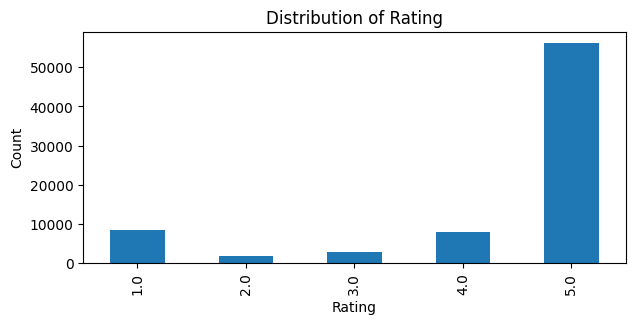

In [19]:
# Plot distribution of rating
plt.figure(figsize=(7,3))
# sns.countplot(df['Rating'])
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 10 Highest-Reviewed Processors')

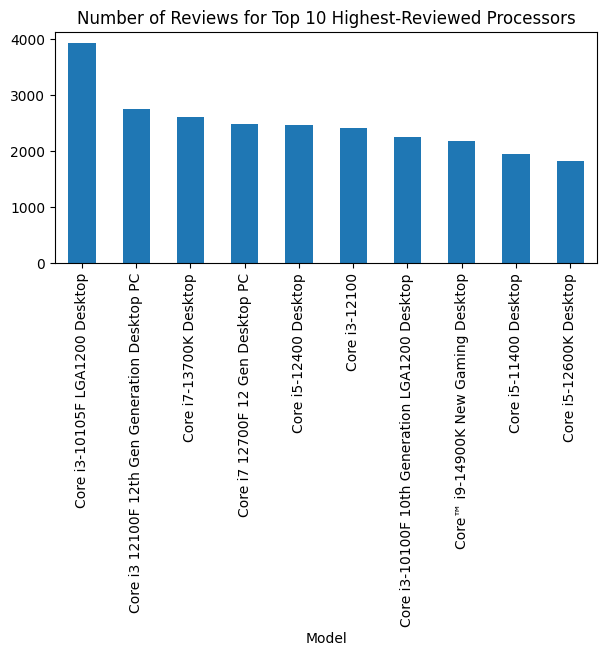

In [20]:
# Plot number of reviews for top 10
brands = df["Model"].value_counts()
# brands.count()
plt.figure(figsize=(7,3))
brands[:10].plot(kind='bar')
plt.title("Number of Reviews for Top 10 Highest-Reviewed Processors")

Text(0, 0.5, 'Count')

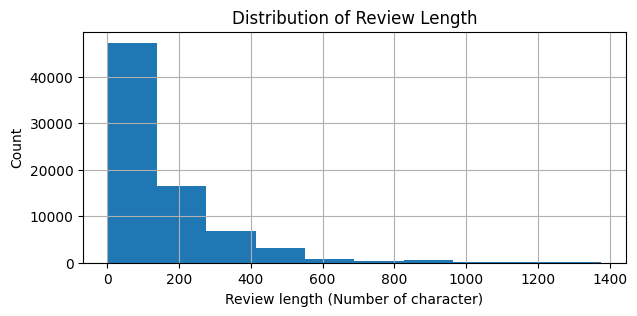

In [21]:
# Plot distribution of review length
review_length = df["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(7,3))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14320\1577005283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Core_Series', y='Rating', palette='Set2', ax=axs[0, 1])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14320\1577005283.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Generation', y='Rating', palette='Set2', ax=axs[1, 0])


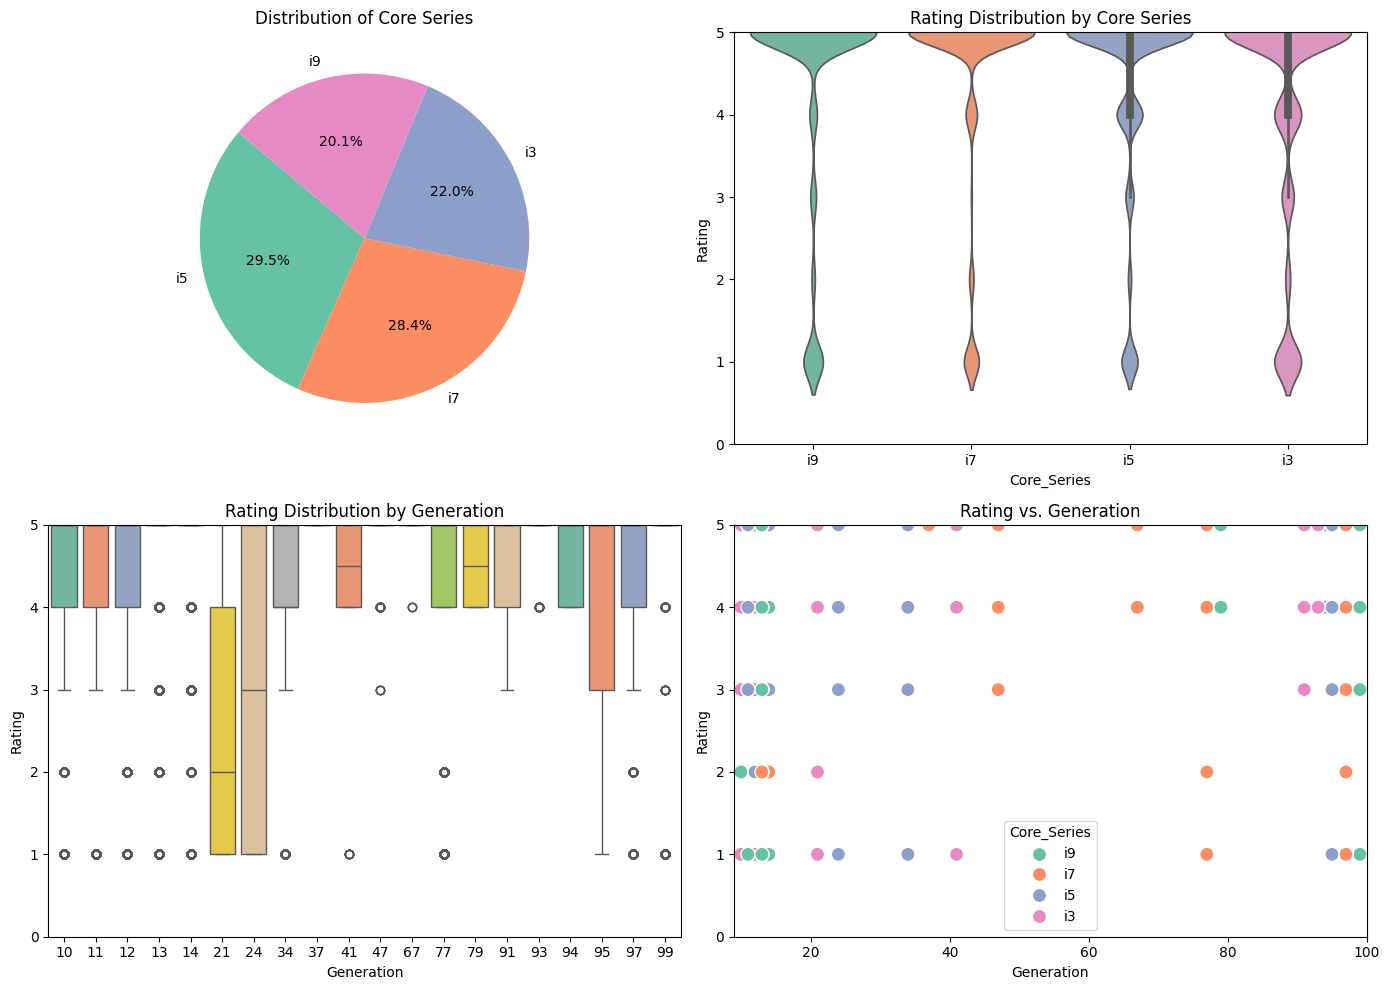

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Pie chart of Core Series distribution
core_series_counts = df['Core_Series'].value_counts()
axs[0, 0].pie(core_series_counts, labels=core_series_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
axs[0, 0].set_title('Distribution of Core Series')

# Plot 2: Violin plot of Ratings by Core Series
sns.violinplot(data=df, x='Core_Series', y='Rating', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Rating Distribution by Core Series')
axs[0, 1].set_ylim(0, 5)

# Plot 3: Box plot of Ratings by Generation
sns.boxplot(data=df, x='Generation', y='Rating', palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Rating Distribution by Generation')
axs[1, 0].set_ylim(0, 5)

# Plot 4: Scatter plot of Rating vs. Generation
sns.scatterplot(data=df, x='Generation', y='Rating', hue='Core_Series', palette='Set2', s=100, ax=axs[1, 1])
axs[1, 1].set_title('Rating vs. Generation')
axs[1, 1].set_ylim(0, 5)
axs[1, 1].set_xlim(df['Generation'].min() - 1, df['Generation'].max() + 1)

plt.tight_layout()
plt.show()

In [ ]:
# Data Preparation

In [24]:
df = df.sample(frac=1, random_state=71) #uncomment to use full set of data

# Drop missing values
df.dropna(inplace=True)

#Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
df['Sentiment'] = np.where(df['Rating'] > 3, 1, 0)
df.head(40)

,Brand,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
44849,Intel,i7,97,Core i7-9700K,5.0,16 July 2019,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1
17261,Intel,i7,12,Core i7-12700K Desktop,5.0,29 March 2022,India,I have paired this processor with Asus Prime Z...,1
60115,Intel,i3,10,Core i3-10100,5.0,22 May 2021,India,Very safe packaging and good performance,1
43544,Intel,i5,11,Core i5-11600KF Desktop,4.0,19 November 2022,the United States,Was able to snag this for about $150 before ta...,1
52599,Intel,i9,14,Core™ i9-14900KS Desktop,5.0,20 April 2024,Italy,Ho preso questo upgrade rimasto entusiasmato d...,1
64821,Intel,i3,12,Core i3 12100F 12th Gen Generation Desktop PC,1.0,26 April 2023,India,Cpu stock cooler fan got broken with 1 blade i...,0
38927,Intel,i7,11,Core i7-11700F 11th Gen Generation Desktop PC,5.0,13 November 2022,France,tres bon processeur qui ne chauffe pas tres bo...,1
4314,Intel,i5,12,Core i5 (12th Gen) i5-12500 3 GHz,5.0,9 February 2022,the United States,Intel 12500.,1
16535,Intel,i7,14,Core™ i7-14700K New Gaming Desktop,5.0,22 March 2024,Mexico,El procesador llego bien empacado y con sus co...,1
37083,Intel,i7,13,Core i7-13700KF Gaming Desktop,5.0,9 April 2023,Japan,【空冷構成】,1


In [27]:
def is_english(text):
  """Checks if the text is in English using langdetect"""
  try:
    return langdetect.detect(text) == 'en'
  except langdetect.LangDetectException:  # Handle potential errors
    return False

# Drop rows with missing reviews or non-English reviews
df = df[df['Reviews'].notnull() & df['Reviews'].apply(is_english)]

df.head(5)

,Brand,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
44849,Intel,i7,97,Core i7-9700K,5.0,16 July 2019,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1
17261,Intel,i7,12,Core i7-12700K Desktop,5.0,29 March 2022,India,I have paired this processor with Asus Prime Z...,1
60115,Intel,i3,10,Core i3-10100,5.0,22 May 2021,India,Very safe packaging and good performance,1
43544,Intel,i5,11,Core i5-11600KF Desktop,4.0,19 November 2022,the United States,Was able to snag this for about $150 before ta...,1
64821,Intel,i3,12,Core i3 12100F 12th Gen Generation Desktop PC,1.0,26 April 2023,India,Cpu stock cooler fan got broken with 1 blade i...,0


In [29]:
df.shape

(46451, 8)

In [28]:
# Now we remove Brand column as it is redundant
df.drop(columns=['Brand'], inplace=True)
df

,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
44849,i7,97,Core i7-9700K,5.0,16 July 2019,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1
17261,i7,12,Core i7-12700K Desktop,5.0,29 March 2022,India,I have paired this processor with Asus Prime Z...,1
60115,i3,10,Core i3-10100,5.0,22 May 2021,India,Very safe packaging and good performance,1
43544,i5,11,Core i5-11600KF Desktop,4.0,19 November 2022,the United States,Was able to snag this for about $150 before ta...,1
64821,i3,12,Core i3 12100F 12th Gen Generation Desktop PC,1.0,26 April 2023,India,Cpu stock cooler fan got broken with 1 blade i...,0
...,...,...,...,...,...,...,...,...
43059,i9,99,Core i9-9900KS Desktop,5.0,17 December 2019,the United States,Plain and simple. Get an AIO cooler. I ran the...,1
38945,i3,10,Core i3-10105F LGA1200 Desktop,5.0,27 April 2024,the United Kingdom,Really good and can basically run any game I t...,1
47866,i7,77,Core™ i7-7700,5.0,7 November 2017,India,First of all thanks to the B Online Store for ...,1
15583,i7,13,Core i7-13700KF Gaming Desktop,5.0,5 April 2024,the United States,This cpu is really amazing at everything. It d...,1


In [ ]:
df.to_csv('dataset.csv', index=False)